In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# load data. Dataset is about analysis of diabetes
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split data into X and y
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [6]:
import numpy as np

test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=7)

y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(f"x_train (shape = {X_train.shape})")
print(f"x_test: (shape = {X_test.shape})")
print(f"y_train: (shape = {y_train.shape})")
print(f"y_test: (shape = {y_test.shape})")

x_train (shape = (514, 8))
x_test: (shape = (254, 8))
y_train: (shape = (514, 1))
y_test: (shape = (254, 1))


In [9]:
# Make an XGBClassifier model, train and print accuracy

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

[16:30:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ezio/.cache/pypoetry/virtualenvs/ml-E-ENnTVx-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ezio/.cache/pypoetry/virtualenvs/ml-E-ENnTVx-py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
y_pred = xgb_clf.predict(X_test)
print("XGBClassifier accuracy:", accuracy_score(y_test, y_pred))

XGBClassifier accuracy: 0.7401574803149606


In [11]:
# Make an RandomForestClassifier model, train and print accuracy

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

/tmp/ipykernel_4590/3593762461.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [12]:
y_pred = rf_clf.predict(X_test)
print("RandomForestClassifier accuracy:", accuracy_score(y_test, y_pred))

RandomForestClassifier accuracy: 0.7598425196850394


In [13]:
# Make an DecisionTreeClassifier model, train and print accuracy

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier accuracy:", accuracy_score(y_test, y_pred))

DecisionTreeClassifier accuracy: 0.7204724409448819


In [15]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

/home/ezio/.cache/pypoetry/virtualenvs/ml-E-ENnTVx-py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ezio/.cache/pypoetry/virtualenvs/ml-E-ENnTVx-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = lr_clf.predict(X_test)
print("DecisionTreeClassifier accuracy:", accuracy_score(y_test, y_pred))

DecisionTreeClassifier accuracy: 0.7874015748031497


# Transfer learning in NN

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

2021-11-03 16:56:11.079491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-03 16:56:11.079529: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


1
2
3


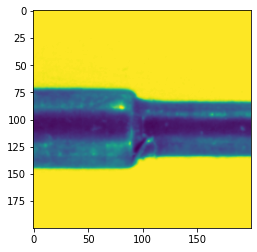

In [18]:
#load data

dataset_path = "newdata/"
# x = []
# y = []
X_train = []
X_test = []
y_train = []
y_test = []
for im in os.listdir(os.path.join(dataset_path, "x_train")):
    i = cv2.imread(os.path.join(dataset_path, "x_train", im))
    i = i.reshape((200, 200, 3))
    X_train.append(i)
    y_train.append(1)
print(1)
for im in os.listdir(os.path.join(dataset_path, 'x_val')):
    i = cv2.imread(os.path.join(dataset_path, 'x_val', im))
    i = i.reshape((200, 200, 3))
    X_test.append(i)
    y_test.append(1)
print(2)
for im in os.listdir(os.path.join(dataset_path, 'y_train')):
    i = cv2.imread(os.path.join(dataset_path, 'y_train', im))
    i = i.reshape((200, 200, 3))
    X_train.append(i)
    y_train.append(0)
print(3)
for im in os.listdir(os.path.join(dataset_path, 'y_val')):
    i = cv2.imread(os.path.join(dataset_path, 'y_val', im))
    i = i.reshape((200, 200, 3))
    X_test.append(i)
    y_test.append(0)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
plt.imshow(X_train[0, :, :, 0])
plt.show()

In [19]:
# Make a data generator
datagentrain = ImageDataGenerator(
    brightness_range=[0.2, 1.2],
    vertical_flip=True,
    rotation_range=10,
    height_shift_range=0.2,
    width_shift_range=0.2,
)

train_generator = datagentrain.flow(X_train, y_train)
datagentest = ImageDataGenerator()
validation_generator = datagentest.flow(X_test, y_test)

In [22]:
# Use pretrained model

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

model = VGG16(include_top=False, input_shape=(200, 200, 3))
# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False
model.layers[-1].trainable = True

# add new classifier layers. Use model.layers[-1].output as an input to a small dense network. 
# Your first layer is Flatten
x = Flatten()(model.layers[-1].output)
x = Dense(128, activation="relu")(x)
x = Dense(1, activation="sigmoid")(x)

# define new model (inputs=model.inputs, outputs=output)
model = Model(inputs=model.inputs, outputs=[x])

# compile model
model.compile(optimizer="adam", loss="binary_crossentropy")

In [27]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, validation_steps=1)

Epoch 1/10
7/7 [==============================] - 12s 2s/step - loss: 0.1459 - val_loss: 17.9360
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.0525 - val_loss: 4.6022

In [28]:
def plot(history) -> None:
    plt.plot(list(range(len(history.history["loss"]))), history.history["loss"], label="loss")
    plt.plot(list(range(len(history.history["val_loss"]))), history.history["val_loss"], label="val_loss")
    plt.xlabel("x")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


plot(history)

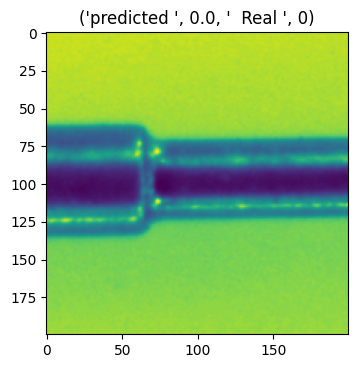

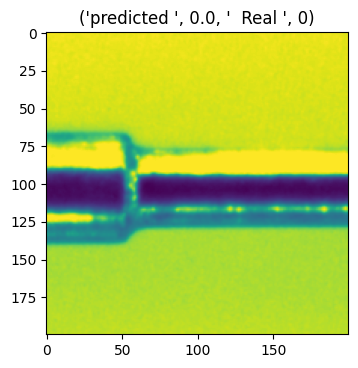

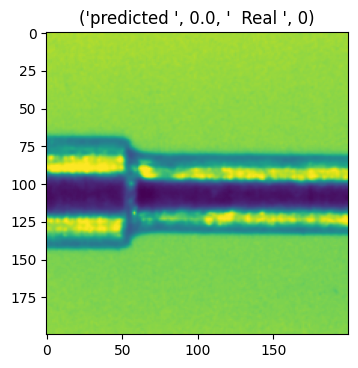

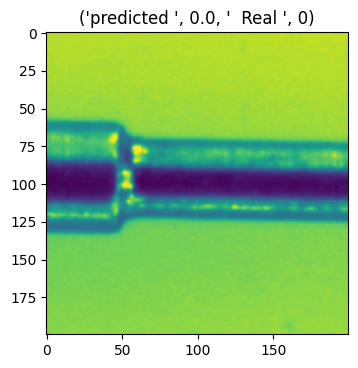

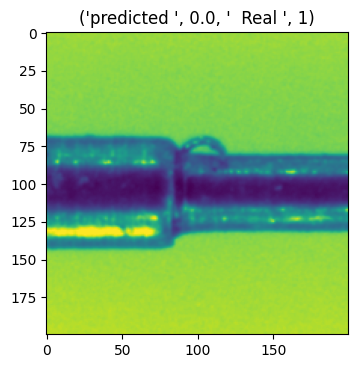

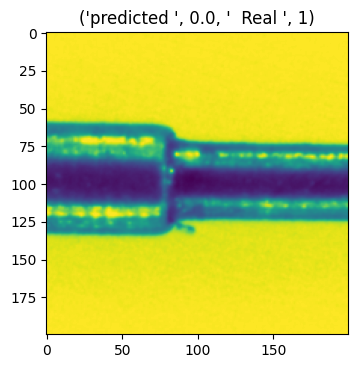

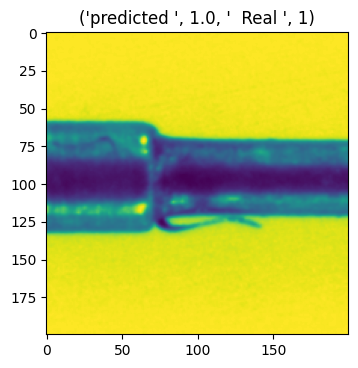

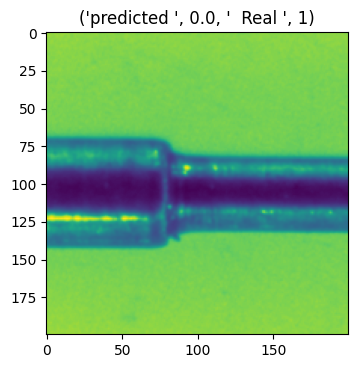

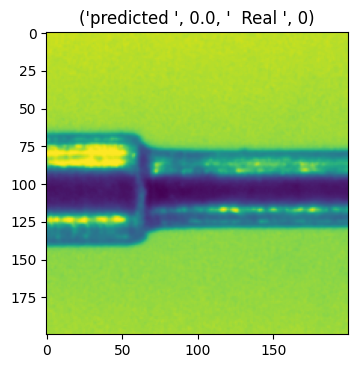

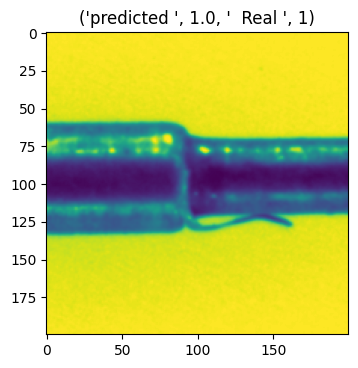

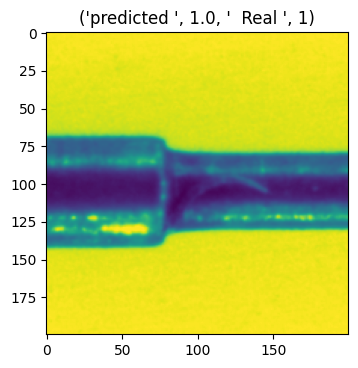

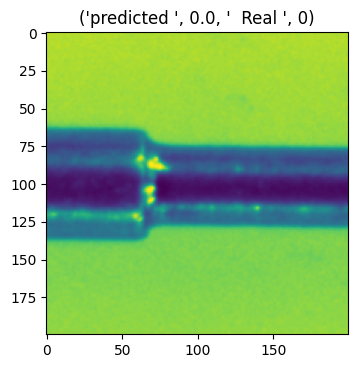

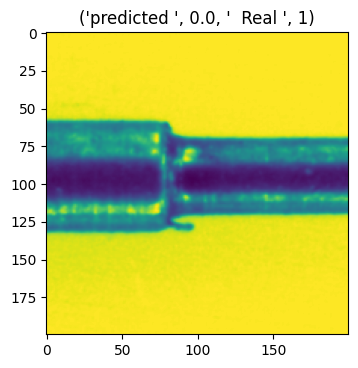

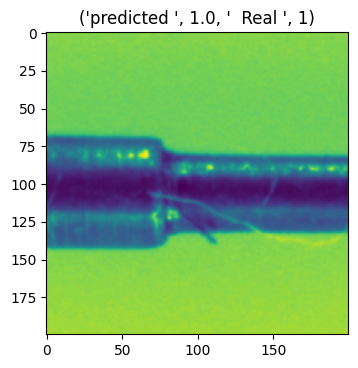

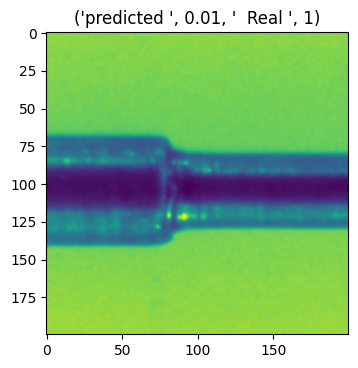

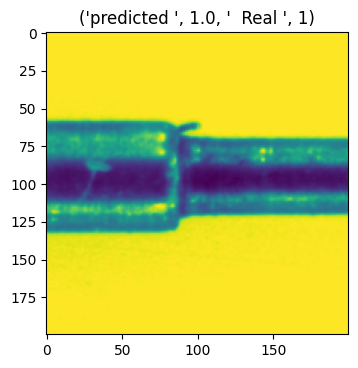

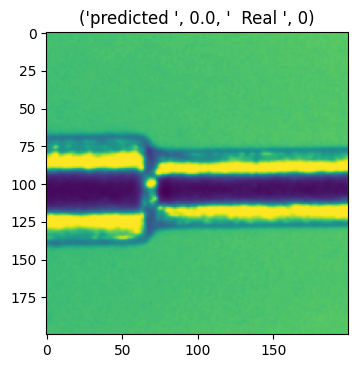

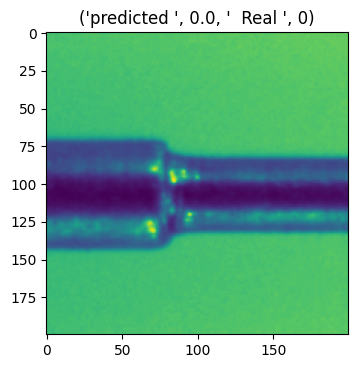

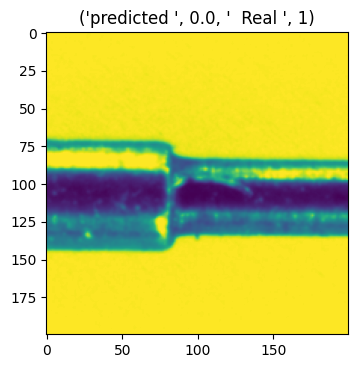

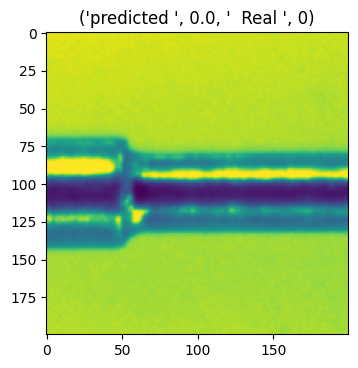

In [26]:
# Make predictions and plot results

import matplotlib.pyplot as plt

for t in validation_generator:
    xb, yb = t
    for x, y in zip(xb, yb):
        image = x
        label = y
        image = image.reshape((1, 200, 200, 3))
        inference = model.predict(image)
        plt.figure(dpi=100)
        plt.title(('predicted ', (round(inference[0][0], 2)), '  Real ', label))
        plt.imshow(image[0, :, :, 0])
        plt.show()
    break